# Distance Matrix

In [27]:
# imports
from sklearn import datasets
import numpy as np

In [35]:
# abstract
dataset = datasets.load_iris()

In [29]:
# dictionary
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [30]:
dataset["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [37]:
data = dataset["data"]
data
# data  # data is a numpy array data structure. Think of it as a matrix of data (or as an excel spreadsheet)

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [42]:
data.shape

(150, 4)

In [45]:
# euclidean distance of 2 observations
data_1 = data[50]
data_2 = data[100]
distance = (sum(data_2-data_1)**2)**0.5

In [65]:
# initialize distance matrix. What will be its final shape?
dist = []

In [66]:
# Build the distance matrix. Use 2 for loops, the append list method and the euclidean distance formula
for obs in data:
    single_row = []
    for obs_2 in data: 
        single_row.append((sum(obs-obs_2)**2)**0.5)
    dist.append(single_row)

In [67]:
dist

[[0.0,
  0.6999999999999993,
  0.7999999999999992,
  0.7999999999999998,
  4.440892098500626e-16,
  1.2000000000000006,
  0.5000000000000001,
  0.09999999999999964,
  1.2999999999999994,
  0.5999999999999991,
  0.600000000000001,
  0.19999999999999973,
  0.8999999999999998,
  1.6999999999999997,
  1.0000000000000002,
  1.800000000000001,
  0.8000000000000007,
  0.09999999999999998,
  1.3000000000000003,
  0.4999999999999999,
  0.5000000000000007,
  0.5000000000000002,
  0.7999999999999998,
  0.39999999999999986,
  0.10000000000000009,
  0.39999999999999947,
  0.20000000000000046,
  0.20000000000000062,
  4.440892098500626e-16,
  0.4999999999999991,
  0.49999999999999956,
  0.5000000000000007,
  0.7000000000000003,
  1.1000000000000005,
  0.4999999999999991,
  0.5999999999999994,
  0.3000000000000005,
  0.1999999999999992,
  1.2999999999999992,
  0.0,
  0.09999999999999953,
  1.7999999999999998,
  1.099999999999999,
  0.5000000000000004,
  0.9999999999999998,
  0.6999999999999998,
  0.5

In [68]:
# another import (usually all imports are done at the top of the script/ notebook)
import seaborn as sns

<AxesSubplot:>

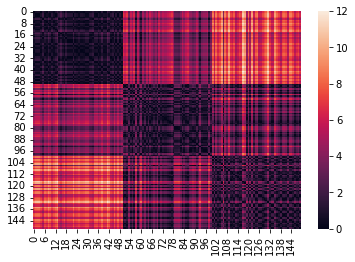

In [69]:
sns.heatmap(dist)

# Plotting data: 
Don't worry about the code as that's not the objective of the exercise and we will learn how to plot data in future classes
### How can we represent an observation in a N-dimensional Space

In [70]:
# another import (usually all imports are done at the top of the script/ notebook)
import matplotlib.pyplot as plt

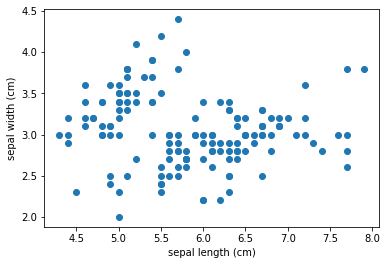

In [71]:
# 2D scatter plot
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel(dataset["feature_names"][0])
plt.ylabel(dataset["feature_names"][1])
plt.show()

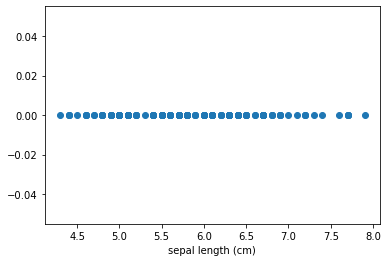

In [72]:
# 1D scatter plot
plt.scatter(data[:, 0], [0 for i in range(data.shape[0])])
plt.xlabel(dataset["feature_names"][0])
plt.show()

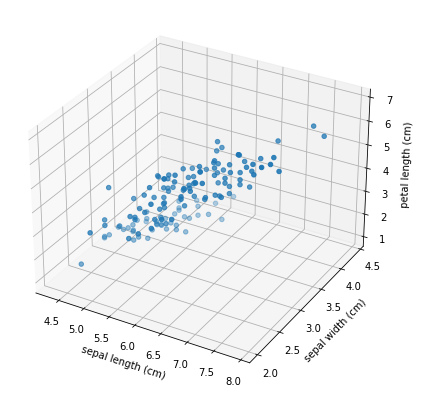

In [74]:
# 3D scatter plot
fig = plt.figure(figsize=(14, 7))  # defining a figure so we can add a 3d subplot
ax = fig.add_subplot(111, projection="3d")
ax.scatter(data[:, 0], data[:, 1], data[:, 2])
ax.set_xlabel(dataset["feature_names"][0])
ax.set_ylabel(dataset["feature_names"][1])
ax.set_zlabel(dataset["feature_names"][2])
plt.show()

## Finding nearest neighbors

In [86]:
# get variables to save closest neighbors later
min_args, min_dist = (None, 9e99)
for id_r, row in enumerate(dist):
    dist_row = row[:id_r]
    dist_ = min(dist_row) if len(dist_row) > 0 else 9e99
    if dist_ <= min_dist:
        for id_c, ind in enumerate(dist_row):
            if ind == dist_:
                min_args = (id_r,id_c)
                min_dist = dist_
                break

In [87]:
min_args

(149, 127)

In [88]:
print(data[min_args[0]])
print(data[min_args[1]])
print('minimum distance:\t', min_dist)

[5.9 3.  5.1 1.8]
[6.1 3.  4.9 1.8]
minimum distance:	 0.0


## Define functions
Why do we want to define functions in this case?

In [ ]:
def distance_matrix(data):
    # CODE HERE
    return dist    

def closest_points(dist_matrix):
    # CODE HERE
    return min_args, min_dist

## Finding the `n` shortest distances

In [ ]:
dist_matrix = distance_matrix(data)
n_distances = 10

# CODE HERE

distances